#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [44]:
boston = load_boston()
data = boston["data"]
target_prices = boston["target"]
y = pd.DataFrame(target_prices, columns=["Price"])
X = pd.DataFrame(data, columns=boston["feature_names"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [45]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne.shape

(404, 2)

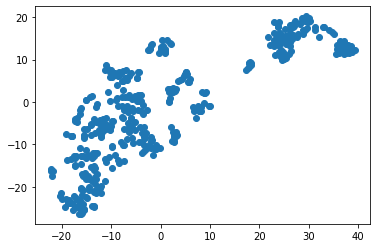

In [46]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [47]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

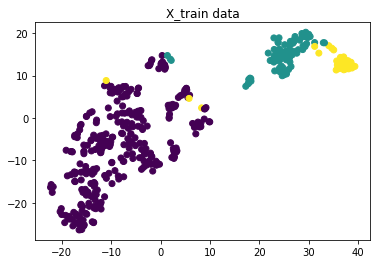

Cluster 1:
CRIM mean: 0.40486282828282827
price mean: 25.16868686868687
Cluster 2:
CRIM mean: 11.745661842105262
price mean: 17.442105263157895
Cluster 3:
CRIM mean: 14.360380322580646
price mean: 13.196774193548388


In [48]:
X_train_clustered = kmeans.fit_predict(X_train)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=X_train_clustered)
plt.title('X_train data')
plt.show()

print("Cluster 1:")
print(f"CRIM mean: {X_train.loc[X_train_clustered == 0, 'CRIM'].mean()}")
print(f"price mean: {y_train.loc[X_train_clustered == 0, 'Price'].mean()}")

print("Cluster 2:")
print(f"CRIM mean: {X_train.loc[X_train_clustered == 1, 'CRIM'].mean()}")
print(f"price mean: {y_train.loc[X_train_clustered == 1, 'Price'].mean()}")

print("Cluster 3:")
print(f"CRIM mean: {X_train.loc[X_train_clustered == 2, 'CRIM'].mean()}")
print(f"price mean: {y_train.loc[X_train_clustered == 2, 'Price'].mean()}")

#### *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [60]:
X_test_clustered = kmeans.predict(X_test)
X_test_clustered

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 2, 2, 0, 0])

In [61]:
print("Cluster 1:")
print(f"CRIM mean: {X_test.loc[X_test_clustered == 0, 'CRIM'].mean()}")
print(f"price mean: {y_test.loc[X_test_clustered == 0, 'Price'].mean()}")

print("Cluster 2:")
print(f"CRIM mean: {X_test.loc[X_test_clustered == 1, 'CRIM'].mean()}")
print(f"price mean: {y_test.loc[X_test_clustered == 1, 'Price'].mean()}")

print("Cluster 3:")
print(f"CRIM mean: {X_test.loc[X_test_clustered == 2, 'CRIM'].mean()}")
print(f"price mean: {y_test.loc[X_test_clustered == 2, 'Price'].mean()}")

Cluster 1:
CRIM mean: 0.24642115942028991
price mean: 23.91159420289855
Cluster 2:
CRIM mean: 8.469301923076923
price mean: 17.392307692307693
Cluster 3:
CRIM mean: 19.021665714285714
price mean: 12.814285714285713
